In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## 檢查 y 中有幾種不同的標籤

In [4]:
import numpy as np

# 檢查標籤的唯一值
unique_labels = np.unique(y)
print("標籤種類數量:", len(unique_labels))
print("標籤種類:", unique_labels)

標籤種類數量: 3
標籤種類: [1 2 3]


## 拆分數據

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142,), (36,))

## Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Applying Kernel PCA

In [7]:
from sklearn.decomposition import KernelPCA

# NOTE: 使用kernal進行處理
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

## 利用降維後的數據進行邏輯回歸

In [8]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [9]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)


# 計算準確率
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


## 視覺化：熱圖

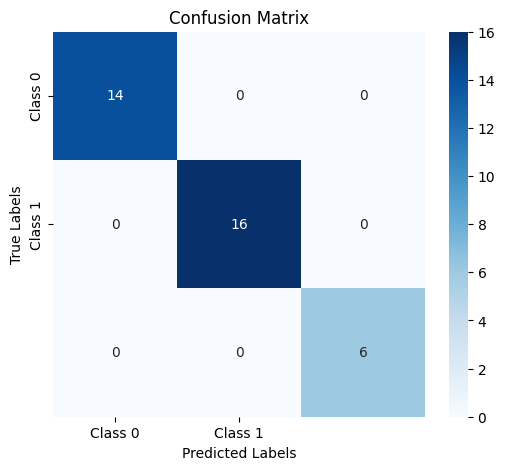

In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = confusion_matrix(y_test, y_pred) # 計算混淆矩陣

# 繪製混淆矩陣的熱力圖
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


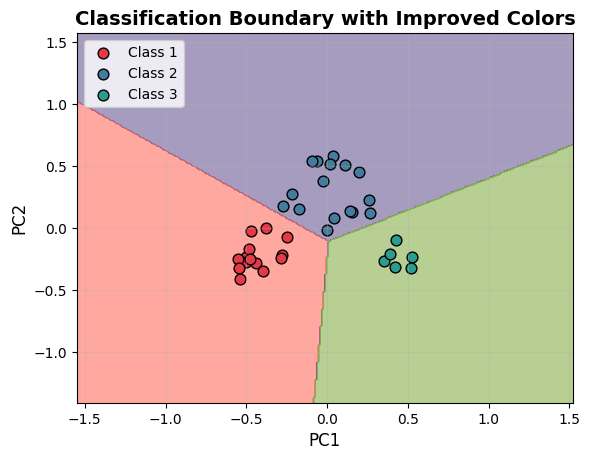

In [11]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

# 使用更現代的調色盤
colors = ['#FF6F61', '#6B5B95', '#88B04B']  # 可自定義 RGB 顏色
boundary_cmap = ListedColormap(colors)

# 生成分類邊界
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

# 繪製分類邊界
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.6, cmap=boundary_cmap)

# 調整每類數據點的顏色
point_colors = ['#E63946', '#457B9D', '#2A9D8F']
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=point_colors[i], edgecolor='black', label=f'Class {j}', s=60)

# 增強標題與軸標籤
plt.title('Classification Boundary with Improved Colors', fontsize=14, fontweight='bold')
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.legend(loc='upper left')
plt.grid(alpha=0.3)  # 添加網格增強視覺
plt.show()